#Modeling and Simulation 4 - Statistical tests

Statistical tests are methods to answer "yes or no" to various research questions about a population using data from a sample. For example:

*   Is the mean height in the population different from 171 cm?  
*   Is the average income disparity between males and females in the organization different from 0?
*   Is the mean of kills in a game differences before and after the bootcamp different from 0 in the population of gameplayers?
*   Is the variable normally distributed in the population?  



There are approximately 100 statistical tests, each tailored for different scenarios and research questions. In this laboratory, you will focus on only two, with the hope that understanding the underlying mechanism of these tests will make it easier to comprehend the others when needed.

##Understanding the p-value and statistical tests

The p-value is a concept closely related to statistical tests. It was developed as a measure to help answer research questions formulated in the manner presented above.

The main principle behind the p-value and statistical testing in general is to assess the **extremeness of an estimate** concerning a population parameter based on the sample, **assuming a specific parameter value for the population**.

For example, suppose we want to determine if the mean height in a population is different from 171 cm. To answer the question, "Is it different?" or "Is it not different?" using a statistical test, we need to follow these steps:

1. Gather a sample and compute the sample mean — This provides an estimate of the population mean.

2. Assume the population mean is 171 cm and define the sampling distribution of the sample means — This involves generating the distribution of sample means that would occur if the true population mean was 171 cm and we would gather many samples similar to the one that we extracted.

3. Compare the sample mean to the sampling distribution of the sample mean and assess its extremity. Determine how unlikely the sample mean you extracted is, given the distribution of possible sample means mentioned at step 2



💡 It is important to contextualize how we arrive at the question, "Is the mean height in the population different from 171 cm?" to better understand the steps outlined above. The key principle at play here is [falsifiability](https://en.wikipedia.org/wiki/Falsifiability), and for the example above, it works as follows:

1. A researcher proposes a theory or model. For it to be considered scientific, it must be falsifiable—meaning it must make predictions that can be proven true or false. For example, suppose that the theory or model predicts that the mean height in the population is 171 cm.
2. Another researcher questions the validity of this theory or model and attempts to falsify it by showing that the sample mean they observed would be a **highly unlikely coincidence if the theory/model was true**. (This is where the p-value comes in—it measures the likelihood of observing a sample mean as extreme as the one observed if the theory/model is correct.)
3. If the sample data suggests that such an outcome is highly unlikely, it can be interpreted as evidence that the proposed theory/model may not be accurate, thereby rejecting it.
4. Replications of the experiment are necessary before reaching a definitive conclusion. Afterwards, novel theories or models can be advanced.

###Exercise 1: Estimation and Pivot Distribution

In this exercise, you will familiarize with the innerworkings of a statistical test used to answer the question "Is the mean height in the population different from 171 cm?"

####a. To begin, fill in the code snippet below to **simulate a population of 1,459 heights measurements of individuals, knowing that their heights are normally distributed with a mean of 173 cm and a standard deviation of 10 cm**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

#ToDo: Set de appropiate parameters
population_size =
mean_height =
std_dev_height =


population_heights = np.random.normal(mean_height, std_dev_height, population_size)

plt.figure(figsize=(10, 6))
plt.hist(population_heights, bins=50, color='skyblue', edgecolor='black')
plt.title('Histogram of Simulated Population Heights')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()


💡This represents our true population. In practice, we don't have access to this data. Instead, we formulate hypotheses about the true mean based on theory or models, then extract samples to confirm/infirm the hypothesis.

####b. Now fill in the code snippet below to **extract a sample of 30 unique individuals from the simulated population and compute the mean**.

In [ ]:
# ToDo: define sample size and extract a random sample of 30 individuals from the population defined above
sample_size = #
sample_heights = np.random.choice(#Give as input the population from which to sample, size=#size of the sample, replace=False)

# ToDo: compute the sample mean
sample_mean_extracted = np.mean(#Give as input the heights in the sample)

print(f"Sample Mean Height (n={sample_size}): {sample_mean_extracted:.2f} cm")

plt.figure(figsize=(10, 6))
plt.hist(sample_heights, bins=50, color='lightgreen', edgecolor='black')

#ToDo: use a red line to show the sample mean on the plot
plt.axvline(#Give as input the value of the mean, color= , linestyle='dashed', linewidth=2)

plt.title('Histogram of heights in one extracted sample (n=30)')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()

💡 This is what we typically work with in practice: a sample and the information related to its extraction, namely its size.

####c. Next, complete the code snippet below to **simulate the distribution of 1000 sample means, assuming the population mean is 171 cm and that you conduct a similar extraction procedure as the one above**.

In [ ]:
#ToDo: Set the hypothesized population parameters (notice that here we deal with a hypothesis, not the true height)
population_size_hypothesis = 1459
std_dev_height_hypothesis = #STDsameAsTheOriginalPopulation
mean_height_hypothesis = #HypothesizedMean

population_heights_if_mean_171 = np.random.normal(mean_height_hypothesis, std_dev_height_hypothesis, population_size_hypothesis)


#ToDo: define how many samples to extract in the simulation and the sample size
num_samples = #how many extraction + means to conduct
sample_size_simulation = #this should have the same sample size as point b above;


sample_means = []
# ToDo:Simulate the repeated sampling process
#Note that this is the same process as the one conducted in the previous code snippet, only that we repeat it for num_samples times
for _ in range(num_samples):
    #ToDo: Draw a random sample from the population of the same size as the one extracted above;
    sample_heights = np.random.choice(#Give as input the hypothesized population from which to sample, size=#, replace=False)
    #ToDo: For each sample compute the sample mean
    sample_mean = np.mean(#Give as input the heights in the current sample)
    #ToDo: Store the sample mean in the array
    sample_means.append(#Give as input the computed mean)

plt.figure(figsize=(10, 6))
plt.hist(sample_means, bins=50, color='salmon', edgecolor='black')
plt.title('Distribution of Sample Means (n=1000 sample means computed from repeated samples of 30 individuals)')
plt.xlabel('Sample Mean Height (cm)')
plt.ylabel('Frequency')
plt.show()


💡 This can also be conceptualized in practice without the need to simulate. We use only three pieces of information: the hypothesized true mean (based on theory or a model), the variance (which we assume to be known or estimate from the sample if the sample is big enough), and the size of the sample.

❗ It can be proved that the mean of the distribution of sample means is equal to the true population mean, and the variance of the sample means is equal to the population variance divided by n.

####d. Now fill in the code below to **map the sample mean that we computed at step b. on the distribution of sample means computed at step c**.

In [ ]:
#ToDo:Plot the 1000 sample means
plt.figure(figsize=(10, 6))
plt.hist(#Give as input the 1000sample means computed at point c, bins=50, color='salmon', edgecolor='black')
plt.title('Distribution of Sample Means (n=1000 sample means computed from samples of 30 individuals)')
plt.xlabel('Sample Mean Height (cm)')
plt.ylabel('Frequency')
#ToDo: plot a red axline at the position corresponding to the sample mean that was extracted at point b.
plt.axvline(#Give as input the mean extracted at point b, color='red', linestyle='dashed', linewidth=1)
plt.show()

We can now assess the extremity of the sample mean we obtained.
Visually, we can already observe if the sample mean that we obtained is highly extreme (or highly unlikely) when compared to the distribution of sample means, assuming the population mean is 171.

In this simulation, we already knew that the true population mean is different from 171. We generated it with a mean of 173. However, in practice, we do not have direct access to the population mean. Instead, we are limited to using the sample mean and comparing it to the distribution of sample means under the assumption of the hypothesized true mean.


❗If the sample mean does not appear extreme, try re-running the code from point b onwards. It is insightful to observe that this procedure may sometimes lead to the conclusion that the obtained sample mean is not extreme when considering a true mean of 171, even though we know the actual mean is 173.

###Exercise 2: Measuring extremness via p-value (one-tailed)

To measure the extremity of the obtained sample mean we can count the proportion of sample means that fall above it (or below, depending on the closest tail) in the distribution of the sample means.

❗Remember that the distribution of the sample means was generated assuming that the population mean (which is the same as the mean of means) is 171.


####f. In the code snippet below, **count the number of sample means from point d. in the previous exercise that are greater than the mean obtained at point b.**


In [ ]:
#ToDo: count the number of means in the distribution of possible samples higher that the one extracted
count_means_greater = sum(mean > #theMeanFromtheSample for mean in #TheListWithTheSampleMeans)

####g. Now **divide the number from point f. by the total number of samples from point d.**

In [ ]:
#ToDo: divide the number of means in the distribution of possible samples higher that the one extracted to the total number of possible samples in the simulated distribution
count_means_greater / len(#TheListWithTheSampleMeans)

0.001

Congratulations! You have just computed your first p-value (one-tailed).

A low p-value indicates a large extremeness of the mean computed from the sample that was collected with respect to the distribution of the possible sample means, a distribution created based on the hypothesis that the true population mean is 171.

This provides evidence to reject the hypothesized value in the population, namely 171, which, since we actually know the population (because we generated it), is 173.

❗ Notice in practice we often use the two-tailed version, which is double the size of our computed p value. In this way, we also consider the possibility of obtaining a sample as extreme as the one obtained with respect to the other tail of the distribution.

The main idea here is that we are looking at the probability of obtaining a sample mean that deviates from the population mean by at least as much as the observed sample mean. Since such a deviation could occur in either direction, we consider both tails of the distribution

###Exercise 3: Theoretical Sampling Distribution and CDF

So far we simulated the distribution of the sample means. This involves having access to the population. However, in practice, we do not have access to the population.

As such, we can use a theoretical distribution, because we know properties of the distributon of the sample means (the mean is equal to the population mean and the variance is equal to the population variance divided by n)

####h. Define the **probability density function (PDF) of a normal distribution with the same mean and variance** as the distribution of the sample means from point c in exercise 1.



❗Remember that the distribution of the sample means has the same mean as the population from which samples were extracted. Likewise, it has the same variance as the population, except that it is divided by the sample size.

❗Also remember that the standard deviation is equal to the square root of the variance. Therefore, the standard deviation of the sample means (Standard Error) is the standard deviation of the population divided by the square root of the sample size

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

#ToDo: Fill in the parameters of a normal distribution using point c. in exercise 1 and standard error
mean_pdf_theoretical =
std_dev_pdf_theoretical = #Here we will assume that we have access to the population standard deviation; there are also approaches based on estimating it from the sample

x_2 = np.linspace(mean_pdf_theoretical - 4 * std_dev_pdf_theoretical, mean_pdf_theoretical + 4 * std_dev_pdf_theoretical, 1000) # Generating the x-axis values for the range from -4 to 4 standard deviations

#ToDo: Generate the theoretical probability density function (PDF) of the sample means
pdf_normal_theoretical = norm.pdf(x_2, loc=#TheMeanOfMeans, scale=#TheStandardDeviationofMeans)

plt.plot(x_2, pdf_normal_theoretical , color='olivedrab', lw=2)
plt.title('Theoretical distribution of the sample means')
plt.xlabel('Mean height in a sample of 30')
plt.ylabel('Probability Density')
plt.grid(True)
plt.show()

####i. Now, **use the theoretical distribution to compute the probability of obtaining a sample mean greater than the one obtained in the actual extraction at point b.**



❗Remember that because we are working with a continuous distribution, we need to integrate rather than simply add probabilities.

In [ ]:
from scipy.integrate import simpson

index_mean = np.searchsorted(x_2, sample_mean_extracted) # This finds the index where x_2 is greater than or equal to 178
dx = x_2[1] - x_2[0]
#ToDo: Integrate the area under the curve from the value of the extracted sample mean to the end (infinity) in the theoretical distribution
probability_greater_than_178 = np.sum(#Values_Equal_OR_Bigger_than_indexmean_in_TheoreticalDistirbution * #MultiplywithDx)


print(f"The probability of observing a value higher than 178 is {probability_greater_than_178:.4f}")

plt.plot(x_2, pdf_normal_theoretical , color='olivedrab', lw=2)
plt.title('Theoretical distribution of the sample means')
plt.xlabel('Mean height in a sample of 30')
plt.ylabel('Probability Density')
#ToDo: plot a red axline at the position corresponding to the sample mean that was extracted at point b.
plt.axvline(#Give as input the mean extracted at point b, color='red', linestyle='dashed', linewidth=1)
plt.grid(True)
plt.show()

Notice that the extremness (or p-value) is close to the one computed at point g.



####j. Use the **Cumulative Distribution Function (CDF) to evaluate the probability of obtaining a sample mean greater than the one obtained in the actual extraction at point b**

Instead of adding or integrating the probabilities above or beyond the sample mean in the Probability Density Function (PDF) of the distribution of the sample means, we can use the Cumulative Distribution Function (CDF) of the same distribution.

While the PDF shows the probability of a specific value x (in this case, the mean value), the CDF shows the probability of x being less than or equal to a certain value.

 To gain a better understanding, try **mapping the extracted sample mean to the CDF of the approximating distribution previously defined**

In [ ]:
#ToDo: Fill in the parameters of a normal distribution using point c. in exercise 1 and standard error
cdf_values = norm.cdf(x_2, loc=#MeanOFSampleMeans , scale=STDofSampleMeans ) # Compute the CDF of the theoretical distribution

plt.plot(x_2, cdf_values, label='CDF', color='olivedrab', lw=2)
#ToDo: plot a red axline at the position corresponding to the sample mean that was extracted at point b.
plt.axvline(#Give as input the mean extracted at point b, color='red', linestyle='dashed', linewidth=1)
plt.title('Cumulative Distribution Function (CDF)')
plt.xlabel('x (Values)')
plt.ylabel('CDF')
plt.show()

Because the CDF shows the probability of obtaining a value (or possible sample mean) less than or equal to a target value (the mean obtained from an actual sample), obtaining the probability of getting a value greater than the target value requires subtracting it from one. Notice that we obtain an approximately similar p-value by using the CDF as we did at point g. in exercise 2.

In [ ]:
import numpy as np
from scipy.stats import norm

#ToDo: Fill in the parameters of the distribution to obtain the probability of a value less than or equal with the value of the extracted sample
cdf_probability_equalOrbigger = norm.cdf(#TheExtractedSampleMean, loc=#TheMeanOFMeans, scale=#TheStandardDeviationOfMeans)

#ToDo: substract the cdf value from 1 to get the probability of a value bigger than it (it should be bigger or equal but we will ignore this for simplicity)
probability_greater_than_sample_mean = 1 - #

print(f"The probability of observing a value higher than 178 in the CDF is {probability_greater_than_sample_mean:.4f}")

The probability of observing a value higher than 178 is 0.0009


###Exercise 4: Standardization


Imagine that you want to repeat the procedure for another population with a different hypothesis. You would need to compute a different sampling distribution of the sample means using the respective mean, standard deviation, and sample size each time. Instead, we can use standardization to always use the same distribution.

❗Remember that standardizing a variable means **transforming it so that it has a mean of 0 and a standard deviation of 1**. This process, often called **z-score normalization**, allows for comparisons across different datasets or variables by placing them on a common scale.

The formula for standardizing a variable $X$ is:

\begin{align}
Z &= \frac{X-\mu}{\sigma}
\end{align}

where:
- $Z$ is the standardized value (z-score),
- $X$ is the original value,
- $\mu$ is the mean of the dataset,
- $\sigma$ is the standard deviation of the dataset.

####k. In the code snippet below, **convert the theoretical distribution defined at point h in the previous exercise into a standard normal distribution**. In other words, standardize the variable representing the sample means.

❗You will need to use the standardization formula above. Remember that $X$ represents the values of the sample means, $\mu$ is the mean of the distribution of the sample means (which is also the hypothesized mean of the population from which the sample was drawn), and $\sigma$ is the standard deviation of the same distribution of the sample means (which is the standard deviation of the original variable divided by the square root of the sample size).

In [ ]:
#ToDo: Use the formula above to standardize the x line of the approximating distribution
x_standardized = ((x_2 - #SubstractTheMeanofMeans) / (#DivideByTheStandardDeviationofMeans))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(x_2, pdf_normal_theoretical, color='olivedrab', lw=2)
plt.title('Original Approximating Distribution of Sample Means\nMean = 171, Std = 10')
plt.xlabel('Height means in repeated samples of 30')
plt.ylabel('Probability Density')
plt.grid(True)
plt.subplot(1, 2, 2)

plt.plot(x_standardized, pdf_normal_theoretical, color='b', lw=2)
plt.title('Standardized Approximating Distribution of Sample Means\nMean = 0, Std = 1')
plt.xlabel('Standardized height means in repeated samples of 30')
plt.ylabel('Probability Density')
plt.grid(True)
plt.tight_layout()
plt.show()

❗Notice that even though the variance and standard deviation change, the relative positions of the data points (the spread of the data) do not change. The overall shape of the distribution stays the same. Here's why:

*   Scaling: When you divide by σ, you’re scaling the data so that it is expressed in terms of the number of standard deviations away from the mean. All data points are just "stretched" or "compressed" based on their distance from the mean, but the overall relationship between the data points remains intact.

*   Shift: By subtracting μ, you shift the data to center it at 0, but this doesn’t affect how the values are spread out around the center (other than making the mean 0). The shape of the distribution, whether it’s symmetric, skewed, or normal, remains the same. All we're doing is relocating and rescaling the data on the number scale.

####l. Now **plot the sample mean obtained in the actual extraction at point b. on the standardized distribution and measure its extremness**.

Since the obtained sample mean is a possible value of the random variable defined by the distribution of all possible sample means, we can apply the standardization formula:


\begin{align}
Z &= \frac{\bar{X}-\mu_0}{\frac{\sigma}{\sqrt{n}}}
\end{align}

where:
- $Z$ is the standardized position/value of the obtained sample mean within the distribution of sample means,
- $\bar{X}$ is the sample mean obtained from the extracted sample,
- $\mu_0$ is the hypothesized population mean (also known as the null hypothesis mean) which is also the average mean in the distribution of the sample means.
- $\frac{\sigma}{\sqrt{n}}$ is the standard deviation of the distribution of sample means (commonly referred to as the standard error)

In [ ]:
#ToDo: standardize the obtained sample mean;
standardized_extracted_mean = ((sample_mean_extracted - #SubstractTheMeanofMeans) / (#DivideByTheStandardDeviationofMeans))

plt.plot(x_standardized, pdf_normal_theoretical, color='b', lw=2)
plt.title('Standardized Theoretical Distribution of Sample Means\nMean = 0, Std = 1')
plt.xlabel('Standardized height means in repeated samples of 30')
plt.ylabel('Probability Density')
#ToDo: plot a red axline at the position corresponding to the standardized sample mean that was extracted at point b.
plt.axvline(#theStandardizedMean, color='red', linestyle='dashed', linewidth=1)

plt.grid(True)
plt.show()


💡 With this approach, you can now use the same standard distribution for all distributions of sample means, regardless of their mean and variance, as long as the distribution of sample means has a roughly normal shape (which it approaches via the Central Limit Theorem as the sample size increases). This provides a convenient shortcut for testing the extremity of sample means. Instead of generating the distribution of sample means each time, you simply standardize the sample mean, mapping it onto the same standard distribution mentioned above.

####m. Identify **the extremness of the standardized sample mean using the Z table**

Instead of calculating the probability above the red line in the previous graph to assess the extremity of the obtained standardized sample mean, we can use the Z-table. The Z-table is nothing more that the almost already done calculations of extremness for each possible value in the standardized distribution. In other words, it contains the CDF values of the Z distribution

First, print the position/value/z-score in the standardized distribution of the obtained sample mean

In [ ]:
#ToDo: Print the standardized extracted mean

print(#TheStandardizedMean)

Next, refer to the Z-table [here](https://users.stat.ufl.edu/~mripol/STA2023/Z-table.pdf). In the first column, locate the row corresponding to the first two digits of the Z-score printed above. Then, in the first row, find the column corresponding to the third digit of the Z-score printed above.

For example, if the Z-score is 3.13, locate the row labeled **3.1** in the first column and the column labeled **0.03** in the first row. The intersection of the **3.1** row and **0.03** column provides the probability of obtaining a Z-score less than or equal to 3.13. In this case, the value is **0.9991**.

To find the probability of obtaining a Z-score greater than 3.13, subtract this value from 1:  1 - 0.9991 = 0.0009

Thus, the probability of obtaining a Z-score greater than 3.13 is **0.0009**.

Congratulations! You have just conducted your first one-sample Z-test, one of the 100 statistical tests mentioned at the beginning of this lab.

## 📓Note: Hypothesis testing is not significance testing but defaults on it

You should distinguish the p-value from alpha ($α$). They belong to different approaches for using data from a sample to make an inference about the population.

While an introduction to both perspectives is beyond the scope of this laboratory, it is worth noting the following:

- The p-value approach is called "significance testing" and follows a post-data collection method. In this approach, you start with a null hypothesis, which you attempt to reject by measuring the extremeness of the sample statistic (as seen in the exercises presented so far, where the null hypothesis was that the population mean was 171). You don't have a decision rule. You just decide, based on domain-knowledge, if something is too extreme. Additionaly, you don't decide only after one experiment. You coduct multiple experiments before taking a decision.
  
- The alpha approach is called "hypothesis testing" and involves both a null hypothesis and an alternative hypothesis. It follows a pre-data collection method, where you first define an alpha level (the acceptable degree of type 1 error) and also consider type 2 error. Based on the desired error rates, you calculate the minimum sample size required for the test. The testing process then becomes similar to the p-value approach, with the main difference being that, instead of computing the p-value, you compare the extremeness of the test statistic to a threshold (alpha).

- There is often confusion between the two approaches, and they are sometimes used interchangeably. For example, researchers might establish both null and alternative hypothesis, an alpha value, skip the sample size calculation, and then compute the p-value, which is incoherent.

In this laboratory, we will focus only on the p-value approach. Most software is built using the p-value approach, as the alpha approach defaults to the p-value method when the required sample size is not computed beforehand. Therefore, we will strictly focus on the p-value approach and exclude terms like "significance level," "alternative hypothesis," "power," "type 1 error," and "type 2 error."

##Two-sample Z-test

In previous exercises, you learned how the one-sample Z-test works under the hood in a significance testing framework:

1. Gather a sample from the population.  
2. Generate a distribution of possible sample means obtained from similar samples, assuming a certain hypothesis as being true ( we use the Z-distribution).  
3. Compute the standardized mean (Z-score) from the extracted sample.  
4. Evaluate the extremity of this Z-score using the Z-distribution.

Formally, the Z-score in the one sample Z-test is computed using the following formula, and its extremity is assessed using Z-tables.


\begin{align}
Z &= \frac{\bar{X}-\mu_0}{\frac{\sigma}{\sqrt{n}}}
\end{align}


The two-sample Z-test works in a similar fashion, except that:

* The mean ($\bar{X}$) is replaced by a difference of means ($\bar{X_1} - \bar{X_2}$).  
* The population mean $\mu_0$ (also called the hypothesis or the hypothesized parameter) is replaced by a mean difference (also called the hypothesized difference); this is often 0.  
* The standard deviation $\frac{\sigma}{\sqrt{n}}$ is replaced by the sum of the standard deviations of the two distributions of the sample mean $\frac{\sigma_1}{\sqrt{n_1}} + \frac{\sigma_2}{\sqrt{n_2}}$.  




\begin{align}
Z &= \frac{(\bar{X_1}-\bar{X_2})-(\mu_1 - \mu_2)}{\frac{\sigma_1}{\sqrt{n_1}} + \frac{\sigma_2}{\sqrt{n_2}}}
\end{align}


💡 If the one-sample Z-test answers questions like "Is the mean height in the population different from 171?", the two-sample Z-test answers questions like "Is the difference in heights between the (sub)population of boys and the (sub)population of girls different from 0?"

###Exercise 5: Is the average income disparity between males and females in the organization different from 0? (*Do males and females have different wages?*)

####a. In the following code snippet, **simulate an organization with 400 males and 600 females, along with their incomes**.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter


np.random.seed(42) #This sets a random seed for reproducibility

#ToDo: Define population sizes
num_males =
num_females =

male_income = np.random.lognormal(mean=9, sigma=0.5, size=num_males)  # Higher log mean for males
female_income = np.random.lognormal(mean=8.8, sigma=0.5, size=num_females)  # Lower log mean for females

plt.figure(figsize=(12, 6))
plt.hist(male_income, bins=30, alpha=0.6, label='Male Income', color='blue')
plt.hist(female_income, bins=30, alpha=0.6, label='Female Income', color='pink')
plt.title('Income Distribution for Males and Females')
plt.xlabel('Income (RON)')
plt.ylabel('Number of Individuals')
plt.legend()
plt.show()

print(f"Average Male Income:RON{np.mean(male_income):,.2f}")
print(f"Average Female Income:RON{np.mean(female_income):,.2f}")



💡In practice, we are unaware of the distribution above as we do not have direct access to the population. Instead, we will try to identify this pattern based on a sample. In this exercise we assume to know that:
*   There are 60% females and 40% males
*   The standard deviation in income is 4000 RON for both populations.



Next we will use a two-sample Z test in order to answer the following question:

Is the average income disparity between males and females in the organization different from 0?


####b. **Extract a random sample  of 200 individuals from the population by considering the male/female proportions**

In [ ]:
# ToDo: Perform stratified sampling by defining the size of each group in accordance to the population proportions
sample_size_males =
sample_size_females =


#ToDo: Extract a sample of males and a sample of females from the population without replacement
#remember that the populations were defined at point a.
sampled_males = np.random.choice(#PopulationFromWhichToSample, size=#, replace=False)
sampled_females = np.random.choice(#PopulationFromWhichToSample, size=#, replace=False)


plt.figure(figsize=(12, 6))
plt.hist(sampled_males, bins=30, alpha=0.6, label='Male Income', color='green')
plt.hist(sampled_females, bins=30, alpha=0.6, label='Female Income', color='lightgreen')
plt.title('Income distribution for the extracted sample of males and females')
plt.xlabel('Income (RON)')
plt.ylabel('Number of Individuals')
plt.legend()
plt.show()

####c. **Conduct the Z-test**

In [ ]:
from statsmodels.stats.weightstats import ztest

#ToDo: Use the ztest() function by giving it the sample of males, the sample of females and whether the variance is equal or not
z_statistic_twosamples, p_value_z_twosamples = ztest(#sampleOfMales, #sampleOfMales, usevar="pooled") ###change usevar to "unequal" if unequal variance is assumed

print(f"Z Statistic: {z_statistic_twosamples}")
print(f"P-value: {p_value_z_twosamples}")

❗ The Z-statistic is the standardized z-score of the difference between the sample means of males and females, where the average mean difference subtracted from it is 0 (the hypothesized difference).

❗The p-value indicates how extreme the standardized difference is in a distribution where we assume the true standardized difference in the population is 0.

####d. **Define a function to simulate multiple replications of the experiment (sample extraction + Z test) on the same population**

The function should work as follows:

1. Draw a sample of males and females from the population defined at point a in this exercise.
2. Run the Z test on these samples.
5. Repeat the process 1000 times and plot the p-values.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.stats.weightstats import ztest

def perform_ztest_iterations(sample_size_males, sample_size_females, num_iterations=1000):
    p_values = []  # List to store p-values from each iteration
    for i in range(num_iterations):
        # ToDo: Randomly sample male and female incomes; this is the same as exercise b
        sampled_males =
        sampled_females =

        # ToDo: Perform the Z-test on the extracted samples; this is the same as exercise
        z_statistic_twosamples, p_value_z_twosamples = ztest()

        p_values.append(p_value_z_twosamples)      # This stores the p-value from this iteration in p_values

    count_under_0_05 = sum(p < 0.05 for p in p_values) # This counts how many p-values are less than 0.05
    print(f'Number of p-values under 0.05: {count_under_0_05}/{num_iterations}')

    plt.figure(figsize=(8, 6))
    plt.plot(range(1, num_iterations + 1), p_values, color='b', alpha=0.7)  # Line connecting p-values horizontally
    plt.title(f'P-values over {num_iterations} Z-test iterations')
    plt.xlabel('Number of Iterations')
    plt.ylabel('P-value')
    plt.yticks([0, 0.05, 0.1, 0.5, 1])
    plt.grid(True)
    plt.show()


Remember that under the hood, the Z test does the following:
*   Draw the sampling distribution of the sample means difference, assuming that the true difference of means between the male and female population is 0. Standardize this distribution, thereby arriving at a Z distribution.
*   Compute the mean difference between the mean of the male sample and the female sample. Standardize this difference using 0 as the average mean and the assumed-to-be-known variance.
*   Map the standardized mean difference onto the Z distribution and get the Z score. Assess its extremity by looking at the probability of obtaining a Z score equal to or greater than that. This is the p-value.

Execute the code below to see the p-value of 1.000 such iterations.




In [ ]:
perform_ztest_iterations(sample_size_males=80, sample_size_females=120, num_iterations=1000)

If, based on our domain knowledge, we set 0.05 as a threshold for extreme results, most iterations suggest rejecting the hypothesis that the difference is 0. However, there are cases where the test indicates no difference between the means. This highlights the risk of concluding no difference between male and female populations, even though we know one exists (given our simulation).

This "repeated sampling" scenario led to the development of "hypothesis testing," where we predefine the acceptable probability of drawing a wrong conclusion.

In significance testing, imagining repeated experiments under the same conditions is unrealistic, as experimental conditions often vary. Therefore, setting an acceptable error level before conducting the test is flawed.

##Paired Z-test

The paired Z-test combines the logic of the one-sample and two-sample Z-tests.

Like the Z-test, it is used to compare two groups, but the key difference is that the same individuals or elements are present in both groups.

In terms of computation, it is similar to the one-sample Z-test, but applied to the differences between paired values rather than the raw data.

💡 If the one-sample Z-test answers questions like "Is the mean height in the population different from 171?", and the two-sample Z-test answers questions like "Is the difference in heights between the sub-population of boys and the sub-population of girls different from 0?", the paired Z-test answers questions like "Is the difference in heights between the same population at Time1 and Time2 different from 0"?

Formally, the paired Z test is based on:


\begin{align}
Z &= \frac{\bar{Xd}-\mu_0d}{\frac{\sigma d}{\sqrt{n}}}
\end{align}

where:
- $Z$ is the standardized position/value of the obtained sample mean difference within the distribution of sample means difference (where the distribution of the sample means is modeled as a Z distribution)
- $\bar{Xd}$ is the sample mean difference obtained from the extracted samples,
- $\mu_0d$ is the hypothesized population mean difference (also known as the null hypothesis mean)
- $\frac{\sigma d}{\sqrt{n}}$ is the standard deviation of the distribution of sample mean differences approximated by the normal distribution

###Exercise 6: Is the mean of kills in a game differences before and after the bootcamp different from 0 in the population of gameplayers? (*Do people obtain more kills after training than before?*)

####a. In the following code snippet, **simulate a population of 2000 gameplayers with their kills score in a game before and after a training**.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

population_size = # Number of gameplayers in the population
mean_kills_before = 4
mean_kills_after = 9

before_score = np.random.poisson(mean_kills_before, population_size)
after_score = np.random.poisson(mean_kills_after, population_size)


data_simulated = pd.DataFrame({
    'Before_Kills': before_score,
    'After_Kills': after_score
})


data_simulated.head()

####b. **Extract a sample of 30 gameplayers**

In [ ]:
# ToDo: extract a random sample of size 30 from the population (data_simulated)
data_extracted = data_simulated.sample(n=#sampleSize, random_state=50)



plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.boxplot(data_extracted['Before_Kills'], vert=True)
plt.title('Boxplot of Before_Kills')
plt.ylabel('Kills Before')
plt.xticks([])
plt.subplot(1, 2, 2)
plt.boxplot(data_extracted['After_Kills'], vert=True)
plt.title('Boxplot of After_Kills')
plt.ylabel('Kills After')
plt.xticks([])
min_val = min(data_extracted['Before_Kills'].min(), data_extracted['After_Kills'].min())
max_val = max(data_extracted['Before_Kills'].max(), data_extracted['After_Kills'].max())
plt.subplot(1, 2, 1)
plt.ylim(min_val - 1, max_val + 1)  # Add padding for clarity
plt.subplot(1, 2, 2)
plt.ylim(min_val - 1, max_val + 1)  # Add padding for clarity
plt.tight_layout()
plt.show()


💡 The boxplot is another way of representing the data. The red line represents the median of the data (not the mean)

####b. **Conduct the paired Z-test**

First, create a new variable representing the difference of scores

In [ ]:
#ToDo: Add a new column to the data_simulated called "Kills_Difference" as the difference between Kills Before and After
data_extracted['Kills_Difference'] =
data_extracted.head()


Use the ztest function of the score difference

In [ ]:
hypothesized_mean_difference = 0 # Hypothesized mean of kill differences in the population

#ToDo: Perform the one-sample Z test on the differences"
z_statistic_onesample, p_value_z_onesample = ztest(#sampleOFdIFFERENCE, value=#hypothesizedMeanOFdIFFERENCES)

print(f"Z Statistic: {z_statistic_onesample}")
print(f"P-value: {p_value_z_onesample}")

Z Statistic: 9.486789023249278
P-value: 2.3826043396281347e-21


####c. **What does the p-value suggests?**

How would you interpret the p-value? Does it indicate a highly unlikely mean difference obtained from the sample, assuming that the true mean difference is 0? Would you conclude that there is a significant difference between the before and after?

## 📓Note: Parametric and non-parametric tests



As mentioned in the introduction to this laboratory, there are approximately 100 statistical tests designed for various scenarios. The variants of the Z-test are called **tests of location** (or **tests of means**). There are also tests for variance, independence, distribution, and more. Fortunately, they all operate on the same principle, which can be outlined in the following steps:

1. **State the (Null) Hypothesis**  
   Formulate a hypothesis about the parameter in the population. In case of hypothesis about groups (sub-populations) this is often stated as a 0 difference between the parameters of the two sub-populations.

2. **Extract a Sample and Compute the Statistic**  
   Draw a sample from the population and compute a sample statistic (e.g., mean, variance) that is used to estimate the parameter in the population. If the population parameter is a mean, then the sample statistic is the sample mean.

3. **Generate the Sampling Distribution**  
   Create the distribution of possible sample statistics (e.g., means, variances) under the assumption that the null hypothesis is true.

4. **Evaluate the Extremenes of the Statistic (p-value)**  
   Compare the actual sample statistic to the sampling distribution and evaluate how extreme it is. This step provides evidence about the stated hypothesis.

The Z-test and other tests (such as the t-test) are called **parametric tests** because they use parameters of the population distribution (or estimates of them) to generate the distribution of possible sample statistics. Moreover, some tests (like the t-test) make assumptions about the population distribution itself (for instance, the t-test assumes the population follows a normal distribution).

There are also **non-parametric tests**. These tests work in a similar manner but do not rely on population parameters (hence, "non-parametric") and make minimal or no assumptions about the population from which the data were extracted (e.g., the Wilcoxon signed-rank test).

##Kologomorov-Smirnov test


Kolmogorov-Smirnov is a non-parametric test of distribution. It helps answer the questions like "Is the variable normally distributed in the population?". It works in a similar manner to the Z test but differes in the use of parameters:

1. **State the (Null) Hypothesis**  
   This time, the hypothesis is about the similarity of a population distribution to a given reference distribution. This is the one-sample variant. A two-sample variant is also available, which refers to the similarity between two population distributions. Here we will only focus on the one-sample variant.  

2. **Extract a Sample and Compute the Statistic**  
   Draw a sample from the population and compute its empirical distribution. Then compute the distance between this distribution and the reference distribution. The distance between the empirical distribution and the reference distribution is the sample statistic.

3. **Generate the Sampling Distribution**  
   The sampling distribution is that of possible distances between two distributions. This distribution is predictable, and its CDF has also been tabulated, similar to the Z-table in previous exercises. This distribution is a distribution of possible distances, assuming that the two distributions are similar.

4. **Evaluate the Extremenes of the Statistic (p-value)**  
   Evaluate the extremeness of the distance between the sample distribution and the reference distribution using the sampling distribution of possible distances.

The distance between the two distributions is computed as the largest absolute difference between the two distribution functions across all values. Formally:


\begin{align}
D_{n} = \sup_{x} \left| F_{n}(x) - F(x) \right|
\end{align}

where:
*   $D_{n}$ is the test statistic
*   $sup_{x}$ is the supremum (the largest element)
*   $F_{n}(x)$ is the reference cumulative distribution which, in the two-sample variant can be another empirical distribution; in the one-sample variant it is a theoretical distribution
*   $F(x)$ is the empirical cumulative distribution




###Exercise 7: Is the variable normally distributed in the population?  

####a. Extract a random **sample of 800 height measurements from the population simulated in Exercise 1, part a.**

In [ ]:
# ToDo: define sample size and extract a random sample of 30 individuals from the population defined in Exercise 1 part a
sample_size_ks = #sample size
sample_heights = np.random.choice(#populationExercise1, size=#sampleSize, replace=False)

plt.figure(figsize=(10, 6))
plt.hist(sample_heights, bins=50, color='lightgreen', edgecolor='black')
plt.title('Histogram of heights in one extracted sample (n=800)')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')
plt.show()

####b. **Conduct the KS test to determine if the variable "height" is normally distributed in the population**.

The KS test of normality implemented in scipy.stats works requires first standardizing the empirical distribution and then comparing its CDF with the theoretical CDF of a standard normal variable.

In [ ]:
from scipy.stats import kstest

# ToDo: Standardize the values in the sample
sample_heights_standardized =

# ToDo: fill in the appropiate parameters for the ks function: the empirical distribution, the reference distribution, and the required information for standardization
ks_stat_norm, p_value_norm = kstest(#StandardizedDistribution, #referenceDistribution writtes as 'norm')

print(f"KS Statistic: {ks_stat_norm}, P-value: {p_value_norm}")

KS Statistic: 0.027998625206997363, P-value: 0.547832665363653


Under the hood, the test draws the CDF of the standardized sample distribution (which would be the blue line in the graph below) and the theoretical CDF of a standard normal variable (which would be the red line in the graph below). It then calculates the supremum distance and maps this distance onto the distribution of possible distances assuming the distributions are equal, resulting in the KS statistic. Finally, the extremeness of this statistic is evaluated, and a p-value is produced.

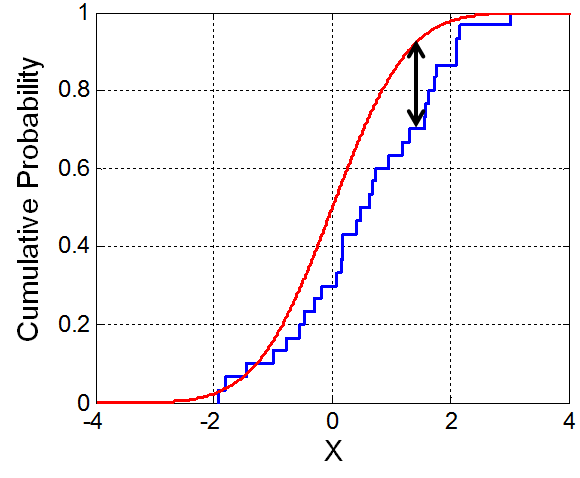

####c. **Interpret the p-value**.

What would the p-valuea mean? Would you answer yes or no to the question "Is height normally distributed in the population" (assuming you don't know the distribution in the population).?